Impoerting Libraries and Datasets

In [2]:
import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import squarify as sqf
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [3]:
df_food = pd.read_csv("E:\SEM6\BIGDATA\PROJECT\Food_Production.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

quick overview of our dataset 

In [4]:
df_food.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [5]:
df_food.head(3)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_food.describe(include="all")


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wheat & Rye (Bread),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,NaN,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,NaN,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,NaN,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,NaN,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,NaN,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593


# Negative values can be spotted under the [Land Use Change] column (notice the minumum values)
# Incosistencies detected in the 75% percentile range for certain columns (e.g. [Animal Feed] and [Transport])
# Radical differences in min/max in latter columns (e.g. [Scarcity Water])

In [7]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

# Mostly numeric variables.Several missing values which already point towards a Missing Not At Random (MNAR) archetype.

Feature Engineering:
1) rename our columns
2) scout for any negative values
3) Third, deal with any missing values

Renaming Columns

In [8]:
df_eutro = df_food.loc[:,["Eutro"in i for i in df_food.columns]]
df_freshwater = df_food.loc[:,["Freshwater"in i for i in df_food.columns]]
df_gas = df_food.loc[:,["gas"in i for i in df_food.columns]]
df_land = df_food.loc[:,["Land"in i for i in df_food.columns]]
df_scarc_water = df_food.loc[:, ["Scarcity" in i for i in df_food.columns]]
df_food.rename(columns = {
    'Food Product': 'Food_Product',
    'Packaging':'Packaging',
    'Total_emissions':'Total_Emissions',
    'Animal Feed':'Animal_Feed',
    df_eutro.columns[0] : "Eutro_Em_1000kcal",
    df_eutro.columns[1] : "Eutro_Em_1kg",
    df_eutro.columns[2] : "Eutro_Em_100gProtein",
    df_freshwater.columns[0] : "Freshwater_1000kcal",
    df_freshwater.columns[1] : "Freshwater_100gProtein",
    df_freshwater.columns[2] : "Freshwater_1kg",
    df_gas.columns[0] : "GGas_Em_1000kcal",
    df_gas.columns[1] : "GGas_Em_100gProtein",
    df_land.columns[0] : "Land_Use_Change",
    df_land.columns[1] : "Land_Use_1000kcal",
    df_land.columns[2] : "Land_Use_1kg",
    df_land.columns[3] : "Land_Use_100gProtein",
    df_scarc_water.columns[0] : "ScarcWater_1kg",
    df_scarc_water.columns[1] : "ScarcWater_100gProtein",
    df_scarc_water.columns[2] : "ScarcWater_1000kcal"
}, inplace=True)
print ("New column name: \n")
for col in df_food:
    print(col)

New column name: 

Food product
Land_Use_Change
Animal_Feed
Farm
Processing
Transport
Packging
Retail
Total_Emissions
Eutro_Em_1000kcal
Eutro_Em_1kg
Eutro_Em_100gProtein
Freshwater_1000kcal
Freshwater_100gProtein
Freshwater_1kg
GGas_Em_1000kcal
GGas_Em_100gProtein
Land_Use_1000kcal
Land_Use_1kg
Land_Use_100gProtein
ScarcWater_1kg
ScarcWater_100gProtein
ScarcWater_1000kcal


In [9]:
print("Unique values - standardized agriculture operations: " + "\n\n"
    + str(df_food[["Retail", "Transport", "Packging", "Animal_Feed"]].nunique()) + "\n\n"
    + "Top 20 Retail Values for Food Products" + "\n"
    + str(df_food[['Food product', 'Retail', 'Transport']].sort_values(by='Retail', ascending=False).head(20)))


Unique values - standardized agriculture operations: 

Retail          4
Transport       8
Packging       10
Animal_Feed    10
dtype: int64

Top 20 Retail Values for Food Products
           Food product  Retail  Transport
13              Soymilk     0.3        0.1
2         Barley (Beer)     0.3        0.0
39               Cheese     0.3        0.1
38                 Milk     0.3        0.1
14                 Tofu     0.3        0.2
42     Shrimps (farmed)     0.2        0.2
37         Poultry Meat     0.2        0.3
36             Pig Meat     0.2        0.3
35        Lamb & Mutton     0.2        0.5
34    Beef (dairy herd)     0.2        0.4
33     Beef (beef herd)     0.2        0.3
31               Coffee     0.1        0.1
0   Wheat & Rye (Bread)     0.1        0.1
4                  Rice     0.1        0.1
12           Groundnuts     0.0        0.1
11                 Nuts     0.0        0.1
41        Fish (farmed)     0.0        0.1
40                 Eggs     0.0        0.1
3  

Addressing negative values


In [10]:
df_numeric = df_food.select_dtypes('number')
neg_values = (df_numeric<0).sum().sum()
print(f"Number of negative values in the dataset: {neg_values}")

Number of negative values in the dataset: 4


In [11]:
(df_numeric<0).sum().sort_values(ascending=False).head(20)

Land_Use_Change           4
Animal_Feed               0
ScarcWater_100gProtein    0
ScarcWater_1kg            0
Land_Use_100gProtein      0
Land_Use_1kg              0
Land_Use_1000kcal         0
GGas_Em_100gProtein       0
GGas_Em_1000kcal          0
Freshwater_1kg            0
Freshwater_100gProtein    0
Freshwater_1000kcal       0
Eutro_Em_100gProtein      0
Eutro_Em_1kg              0
Eutro_Em_1000kcal         0
Total_Emissions           0
Retail                    0
Packging                  0
Transport                 0
Processing                0
dtype: int64

In [12]:
df_food[df_food['Land_Use_Change']<0][['Food product', 'Land_Use_Change']]


,Food product,Land_Use_Change
11,Nuts,-2.1
19,Olive Oil,-0.4
25,Citrus Fruit,-0.1
29,Wine,-0.1


In [13]:
# Replace all negative values with zero so we can proceed with the analysis
for col in df_food.iloc[:, df_food.columns.get_loc('Land_Use_Change'):df_food.columns.get_loc('ScarcWater_1000kcal')]:
    for ind, entry in enumerate(df_food[col]):
        if entry<0:
            df_food.at[ind,col]=0
print(f"Number of negative value in dataset: {((df_food.iloc[:,1:-1])<0).sum().sum()}")


Number of negative value in dataset: 0


In [14]:
# Creating a food category column which we will retain for all following sections of this analysis.
df_food['Category'] = df_food["Food product"]
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]

# Replacing all [Food_Products] in the newly developed column with their respective food [Category]
for i in df_food["Category"]:
    if i in Grains:
        df_food["Category"].replace([i], "Grains", inplace=True)
    elif i in Nuts:
        df_food["Category"].replace([i], "Nuts", inplace=True)
    elif i in Vegetables:
        df_food["Category"].replace([i], "Vegetables", inplace=True)
    elif i in Fruits:
        df_food["Category"].replace([i], "Fruits", inplace=True)
    elif i in Sugars:
        df_food["Category"].replace([i], "Sugar", inplace=True)
    elif i in Oils:
        df_food["Category"].replace([i], "Oils", inplace=True)
    elif i in Dairy:
        df_food["Category"].replace([i], "Dairy", inplace=True)
    elif i in Animal_Prod:
        df_food["Category"].replace([i], "Animal_Prod", inplace=True)
    elif i in Other:
        df_food["Category"].replace([i], "Other", inplace=True)

In [15]:
n_NAvalues = df_food.isna().sum()
perc_NAvalues = round(df_food.isna().sum()/len(df_food)*100,ndigits=1)

table_NA_info = pd.DataFrame({
    "Data Types": df_food.dtypes,
    "Unique Values" : df_food.nunique(),
    "Total NA Values": n_NAvalues,
    "%Perc NA Values": perc_NAvalues})

table_NA_info.sort_values(by = "%Perc NA Values", ascending = False)

,Data Types,Unique Values,Total NA Values,%Perc NA Values
ScarcWater_100gProtein,float64,26,17,39.5
Freshwater_100gProtein,float64,26,17,39.5
Land_Use_100gProtein,float64,27,16,37.2
GGas_Em_100gProtein,float64,27,16,37.2
Eutro_Em_100gProtein,float64,27,16,37.2
Freshwater_1000kcal,float64,30,13,30.2
ScarcWater_1000kcal,float64,30,13,30.2
Land_Use_1000kcal,float64,33,10,23.3
Eutro_Em_1000kcal,float64,33,10,23.3
GGas_Em_1000kcal,float64,33,10,23.3


In [16]:
upper_NA_threshold = len(table_NA_info[table_NA_info["%Perc NA Values"]>30])
middle_NA_threshold = len(table_NA_info[(table_NA_info["%Perc NA Values"]>20) & (table_NA_info["%Perc NA Values"]<30)])
low_NA_threshold = len(table_NA_info[(table_NA_info["%Perc NA Values"]>10) & (table_NA_info["%Perc NA Values"]>20)])
perc_NA = round((sum(df_food.isna().any())/len(df_food))*100,ndigits=2)

print("Percentage of columns with NA values in original dataset: " + "%" + str(perc_NA) + "\n"
      "Number of columns with 30% to 40% missing values: " + str(upper_NA_threshold) + "\n"
      "Number of columns with 20% to 30% missing values: " + str(middle_NA_threshold) + "\n"
      "Number of columns with 10% to 20% missing values: " + str(low_NA_threshold))

Percentage of columns with NA values in original dataset: %32.56
Number of columns with 30% to 40% missing values: 7
Number of columns with 20% to 30% missing values: 3
Number of columns with 10% to 20% missing values: 10


Imputation Methods

In [17]:
# 1 Dropping columns with missing values
diff = round((len(df_food.dropna())/len(df_food))*100,ndigits=2)
print("Number of rows in original dataset: "+str(len(df_food))+"\n"
      "Number of rows after dropping NA values:"+str(len(df_food.dropna()))+"\n"
      "Percentage difference: "+"%"+str(diff))

Number of rows in original dataset: 43
Number of rows after dropping NA values:24
Percentage difference: %55.81


In [18]:
# 2) Imputation by average value (mean)

numeric_columns = df_food.select_dtypes(include=np.number).columns
df_mean = df_food.copy(deep=True)
df_mean[numeric_columns] = df_mean[numeric_columns].fillna(df_mean[numeric_columns].mean())
df_mean_na_sum = df_mean.isna().sum().sum()

print(f"Method: Mean Imputation \n" 
      + f"Number of missing values in dataset: {df_mean_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_mean['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_mean['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_mean['Eutro_Em_100gProtein'].mean(),2)}")


Method: Mean Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 27.18 
Mean value in Freshwater_100gProtein: 1437.98 
Mean value in Eutro_Em_100gProtein: 52.77


In [19]:
df_mean.describe()

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,40.541356,77.723571,40.939993,447.990096,1112.513242,1217.351290,9.264288,15.285445,24.744768,73.670048,38.794807,53397.625506,69381.104324,13488.030328
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,187.372442,814.366438,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,16.843327,16.920000,52.771953,504.188977,1437.975324,482.400000,3.243056,13.524906,4.354167,8.410000,27.025000,17982.700000,59196.438503,17380.575408
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,27.181547,46.141316,52.771953,550.140858,1437.975324,970.252632,5.633943,13.524906,12.423165,23.965000,29.105042,36607.428947,59196.438503,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [20]:
# 3) KNN Imputation Clustering-based imputation
df_numeric = df_food.iloc[:,1:-1]
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = "distance", metric = "nan_euclidean")
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns = df_numeric.columns)
df_knn.insert(0, "Food product", df_food["Food product"]) # re-attaching the excluded [Food_Product] column
df_knn_na_sum = df_knn.isna().sum().sum()



In [21]:
print(f"Method: KNN Imputation \n" 
      + f"Number of missing values in dataset: {df_knn_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_knn['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_knn['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_knn['Eutro_Em_100gProtein'].mean(),2)}")

Method: KNN Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 25.31 
Mean value in Freshwater_100gProtein: 1329.92 
Mean value in Eutro_Em_100gProtein: 48.35


In [22]:
#  MICE Imputation # For this section we will make use of the IterativeImputer library which features multivariate imputation. This is because it utilizes multiple features as opposed to the univariate imputation from SimpleImputer which deals with missing values using only data from one feature.
df_numeric = df_food.select_dtypes('number')
df_mice = df_numeric.copy(deep=True)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
# Bayesian Ridge model.
mice_imputer = IterativeImputer(
    missing_values = np.nan,
    estimator = BayesianRidge(), 
    initial_strategy = 'mean',   
    imputation_order = 'ascending',
    verbose = 1,
    max_iter = 9)
df_mice = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns = df_mice.columns)
df_mice.insert(0,"Food product", df_food["Food product"])
df_mice.insert(1,"Category", df_food["Category"])

df_mice_na_sum = df_mice.isna().sum().sum()

[IterativeImputer] Completing matrix with shape (43, 22)
[IterativeImputer] Change: 37380.079301150654, scaled tolerance: 431.62 
[IterativeImputer] Change: 1710.7499297605148, scaled tolerance: 431.62 
[IterativeImputer] Change: 259.62986557838485, scaled tolerance: 431.62 
[IterativeImputer] Early stopping criterion reached.


In [23]:
print(f"\nMethod: KNN Imputation \n" 
      + f"Number of missing values in dataset: {df_mice_na_sum} \n\n"
      + f"Mean value in Eutro_Em_1000kcal: {round(df_mice['Eutro_Em_1000kcal'].mean(),2)} \n"
      + f"Mean value in Freshwater_100gProtein: {round(df_mice['Freshwater_100gProtein'].mean(),2)} \n"
      + f"Mean value in Eutro_Em_100gProtein: {round(df_mice['Eutro_Em_100gProtein'].mean(),2)}")


Method: KNN Imputation 
Number of missing values in dataset: 0 

Mean value in Eutro_Em_1000kcal: 28.24 
Mean value in Freshwater_100gProtein: 1329.64 
Mean value in Eutro_Em_100gProtein: 51.15


Visualization and Analysis

In [24]:
#we will opt for the MICE imputation using Bayesian Ridge
df = df_mice

print(df.columns)

Index(['Food product', 'Category', 'Land_Use_Change', 'Animal_Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total_Emissions',
       'Eutro_Em_1000kcal', 'Eutro_Em_1kg', 'Eutro_Em_100gProtein',
       'Freshwater_1000kcal', 'Freshwater_100gProtein', 'Freshwater_1kg',
       'GGas_Em_1000kcal', 'GGas_Em_100gProtein', 'Land_Use_1000kcal',
       'Land_Use_1kg', 'Land_Use_100gProtein', 'ScarcWater_1kg',
       'ScarcWater_100gProtein', 'ScarcWater_1000kcal'],
      dtype='object')


In [25]:
df.describe()


,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,28.239093,45.463922,51.152778,461.883414,1329.644686,932.252041,6.035755,14.880588,11.460885,28.889196,27.663381,36597.816677,52334.685418,16222.787006
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,40.640683,77.953793,41.090052,455.878115,1126.399793,1217.355867,9.311388,15.480209,24.845678,73.705138,38.869389,53397.652342,70272.967628,13658.433850
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,180.289109,781.193204,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,16.843327,16.920000,47.206428,342.906895,1212.970472,482.400000,3.243056,14.427230,4.354167,8.410000,22.980171,17982.700000,45619.024077,12487.986110
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,32.715507,42.980000,52.349303,550.140858,1329.754330,977.966837,7.648929,18.643346,9.875350,22.034625,26.676003,36472.023994,52341.104125,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [27]:
df_operations = df[['Land_Use_Change', 'Animal_Feed','Farm','Processing','Transport','Packging','Retail']]

print(f"Sum of [Total_Emissions]: {df['Total_Emissions'].sum().sum()}\n" +
      f"Sum of Operational Features: {df_operations.sum().sum().round()}\n" +
      f"Sum without Retail: {df.iloc[:,2:8].sum().sum().round()}")

Sum of [Total_Emissions]: 256.8
Sum of Operational Features: 260.0
Sum without Retail: 257.0


In [28]:
df_categ_group = df.groupby(["Category"]).sum().sort_values(by='Total_Emissions', ascending = False)
df_categ_group
#Animal Products are at the top of list for [Total_Emissions]

,Food product,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
Category,,,,,,,,,,,,,,,,,,,,,,,
Animal_Prod,Beef (beef herd)Beef (dairy herd)Lamb & Mutton...,23.1,17.0,90.3,4.2,2.2,1.9,1.2,139.9,504.968616,1218.992900,636.134226,6131.859418,7964.102848,13641.133673,88.417310,122.169646,288.957256,821.210512,420.416509,473854.429053,285351.620950,188981.716031
Other,TofuWineCoffeeDark Chocolate,19.0,0.0,15.2,1.7,0.5,2.9,0.4,39.6,279.503717,235.006054,415.712276,954.051910,3656.520833,1570.625980,74.970105,164.069713,67.798333,116.385923,217.465160,40851.789455,104316.168807,28681.684581
Oils,Soybean OilPalm OilSunflower OilRapeseed OilOl...,6.5,0.0,12.3,2.7,1.4,4.3,0.0,26.8,35.344830,129.470000,225.273232,773.252519,5154.334841,3808.400000,9.958220,89.646826,13.639455,67.540000,122.948370,239367.700000,162878.117175,38610.762396
Dairy,SoymilkMilkCheese,5.2,2.5,14.7,1.0,0.3,0.4,0.9,25.0,75.606678,110.080000,129.027917,2826.763919,5655.193793,6261.200000,20.084064,40.059640,42.989635,97.400000,90.369021,201592.500000,187658.380344,90997.053115
Grains,Wheat & Rye (Bread)Maize (Meal)Barley (Beer)Oa...,0.4,0.0,6.5,0.5,0.4,0.9,0.5,9.2,119.101414,141.839681,211.210690,2175.539836,7525.781690,5505.378116,21.174906,52.004561,33.492765,78.868997,95.468668,177708.498610,241207.435909,69220.855787
Vegetables,PotatoesCassavaOther PulsesPeasTomatoesOnions ...,1.0,0.0,3.8,0.1,1.1,0.5,0.0,6.5,128.608198,48.410000,247.078358,3867.256760,8006.711307,1525.800000,27.996506,69.849477,24.420132,28.170000,77.675278,73743.200000,273252.648706,133411.335868
Sugar,Cane SugarBeet Sugar,1.2,0.0,1.0,0.2,1.4,0.2,0.0,4.0,6.361823,22.330000,82.087525,238.689459,1882.104101,837.800000,1.427350,35.483744,1.102564,3.870000,49.730263,25931.900000,55652.947654,7388.005698
Fruits,Citrus FruitBananasApplesBerries & GrapesOther...,0.1,0.0,1.9,0.1,0.9,0.3,0.0,3.2,59.233950,15.530000,235.917269,1902.048324,14091.032695,950.400000,14.882182,65.084603,16.739894,6.720000,104.036041,48968.400000,775691.562308,92253.162150
Nuts,NutsGroundnuts,0.4,0.0,3.5,0.4,0.2,0.2,0.0,2.6,5.551752,33.290000,17.127953,991.524671,3238.939402,5986.100000,0.626815,1.497085,3.678007,22.070000,11.416069,291687.700000,164382.591120,48035.265620


In [ ]:
# we can also utilize the pivot_table command for a similar result
# cols_order = list(df.columns.values)
# df_piv = df.round(2).pivot_table(cols_order,index='Category', aggfunc="sum")
# df_piv = df_piv.reindex(cols_order,axis=1) # re-indexing the columns in the same order as our dataset
# df_piv.drop(df_piv.iloc[:,0:2],axis=1) # deleting the NaN columns

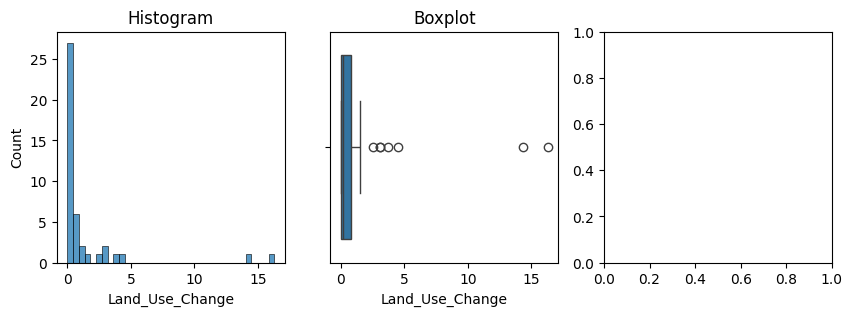

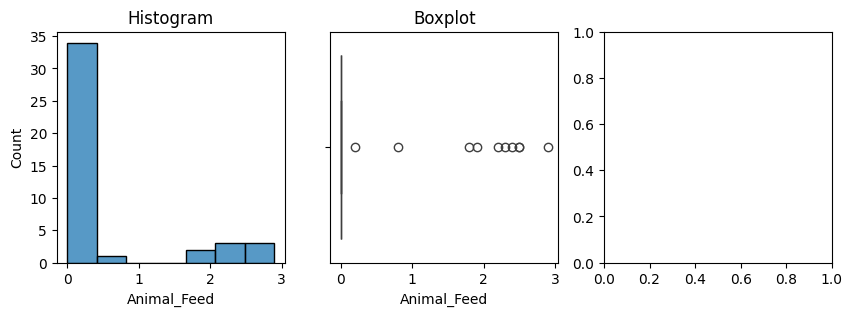

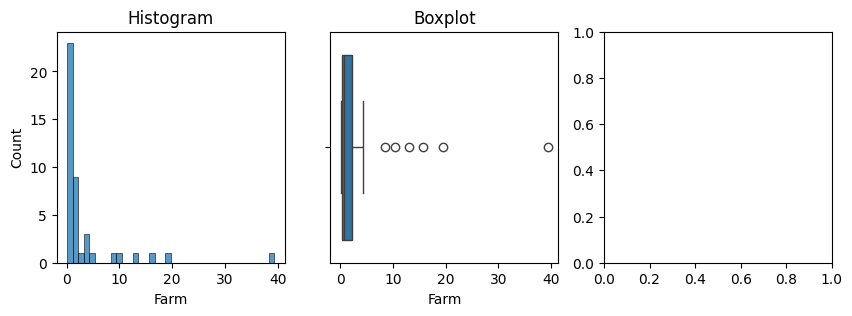

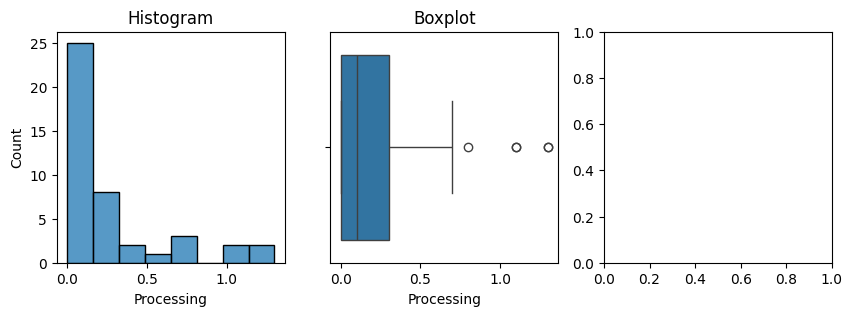

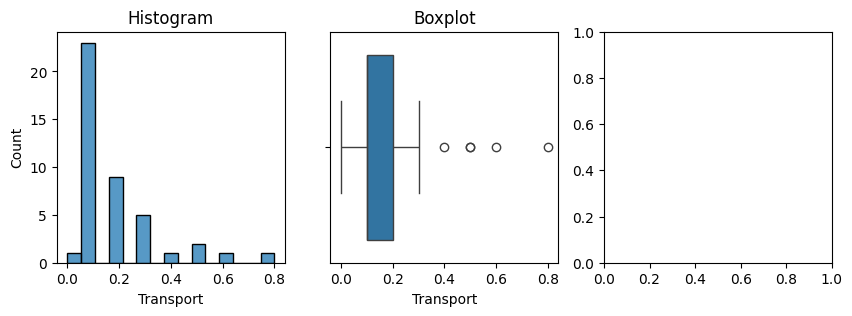

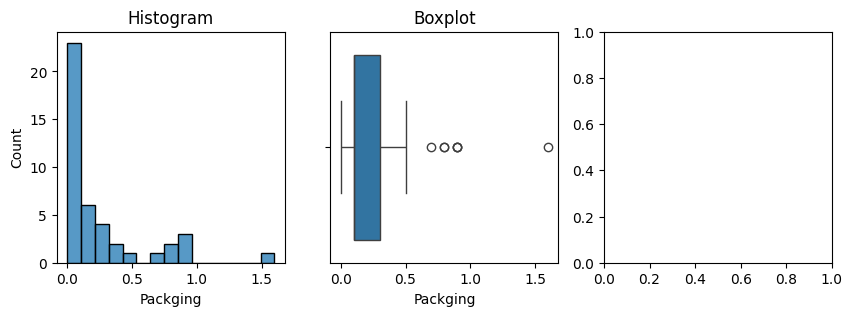

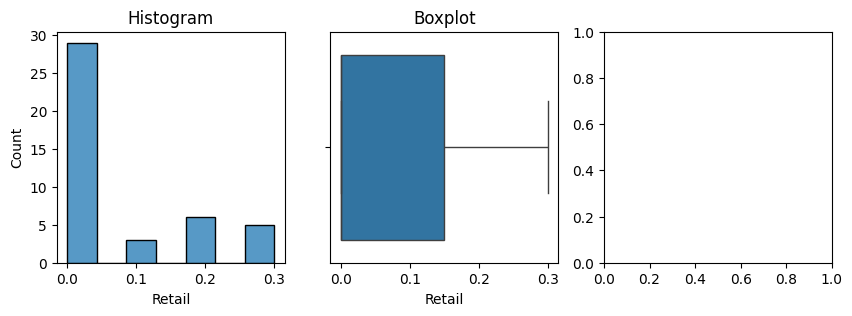

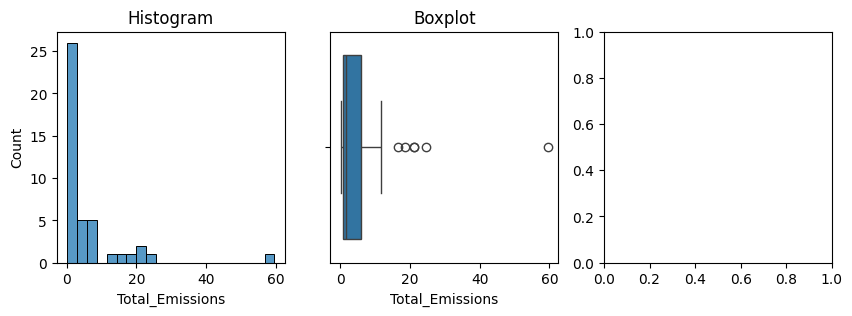

In [29]:
# quick overview of the primary "operational" features
df_operational = df_food.iloc[:,1:9]
df_oper_col = df_operational.select_dtypes('number').columns

for col in df_oper_col:
    fig, ax = plt.subplots(1, 3, figsize=(10,3))
    sns.histplot(data=df_operational, x=col, ax=ax[0]).set(title="Histogram")
    sns.boxplot(data=df_operational, x=col, ax=ax[1]).set(title="Boxplot")

[Total_Emissions] by each [Food_Product] filtered by the food [Category]

Text(0.5, 0.98, 'Total Emissions by Food Product, filtered by Food Category')

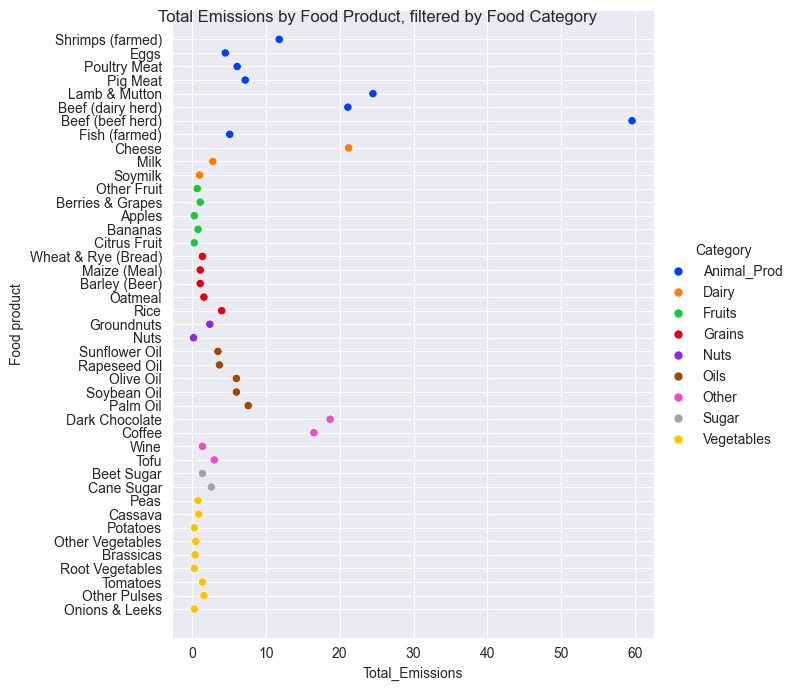

In [31]:
sns.set_style("darkgrid")
rel_plot = sns.relplot(data=df_food.sort_values(by='Category'), x='Total_Emissions', y='Food product',
            hue='Category', palette="bright",
           height=7, aspect=1)
rel_plot.fig.suptitle("Total Emissions by Food Product, filtered by Food Category")

Emissions by Product Category

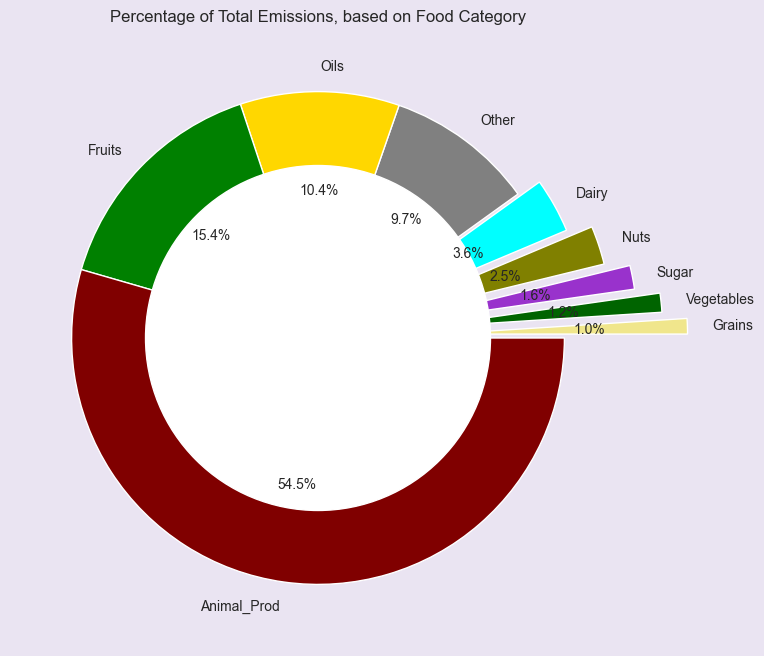

In [34]:
pie_data = df.groupby(['Category'])["Total_Emissions"].sum().sort_values()
labels = list(df["Category"].unique())
explode_vals= [0.5,0.4,0.3,0.2,0.1,0,0,0,0]
color_vals = ["khaki", "darkgreen", "darkorchid", "olive", "aqua", "grey", "gold", "green", "maroon"]

fig= plt.figure(figsize=(13,8), facecolor = '#eae4f2')
plt.pie(pie_data, labels=labels, autopct='%.1f%%', explode = explode_vals, colors = color_vals)

donut = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Percentage of Total Emissions, based on Food Category')
plt.show()

top 15 list

Grand sum of Total_Emissions: 256.8
Sum of Top 15 Food products: 219.9
Total Emission percentage of Top 15 Food Products: 85.6%


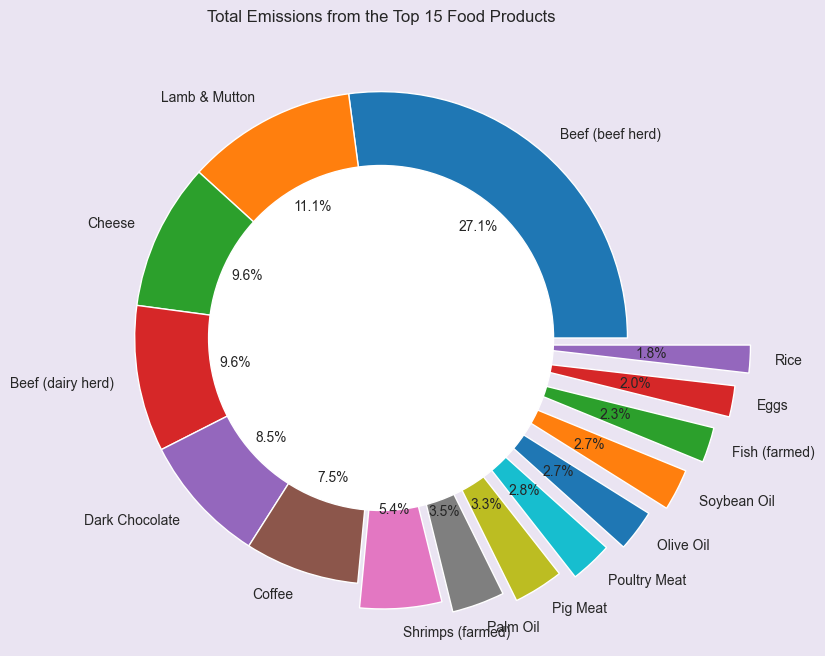

In [37]:
df_top15_emm = df.groupby(['Food product'])['Total_Emissions'].sum().sort_values(ascending=False).head(15)
diff_top15 = round(((df_top15_emm.sum()/df['Total_Emissions'].sum())*100), 1)

labels_15 = df_top15_emm.index
explode_vals= [0,0,0,0,0,0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

fig = plt.figure(figsize=(15,8),facecolor = '#eae4f2')
plt.pie(df_top15_emm, labels=labels_15, autopct='%.1f%%', explode=explode_vals)

donut = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Total Emissions from the Top 15 Food Products')

print(f"Grand sum of Total_Emissions: {df['Total_Emissions'].sum()}\n" +
     f"Sum of Top 15 Food products: {df_top15_emm.sum().round(1)}\n" +
     f"Total Emission percentage of Top 15 Food Products: {diff_top15}%")

plt.show()

Visualizing Greenhouse emissions in order of product value chain without a loop

Text(0.5, 0.98, 'Greenhouse Emissions by Food Category')

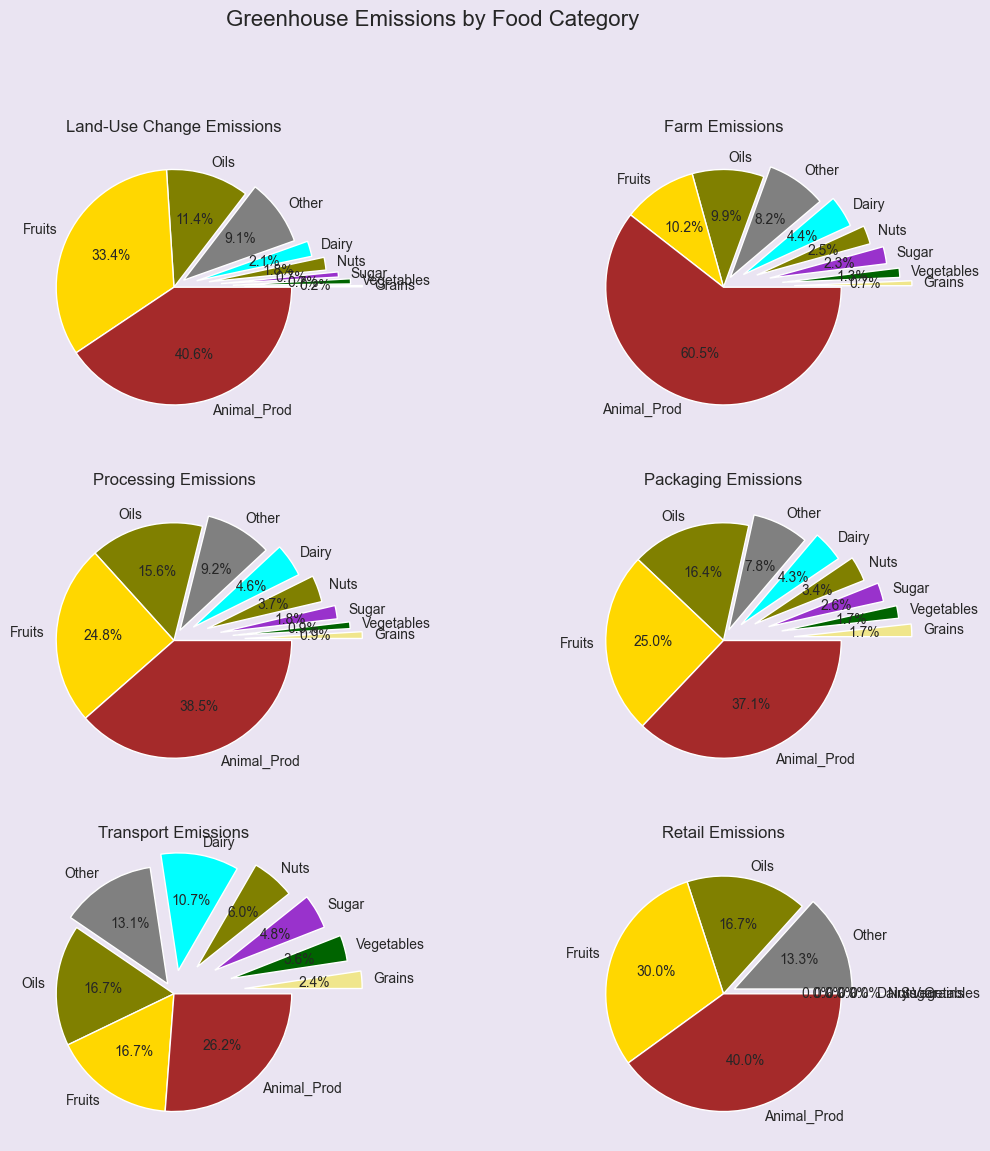

In [39]:
data_land = df.groupby(['Category'])['Land_Use_Change'].sum().sort_values()
data_farm = df.groupby(['Category'])['Farm'].sum().sort_values()
data_proce = df.groupby(['Category'])['Processing'].sum().sort_values()
data_transp = df.groupby(['Category'])['Transport'].sum().sort_values()
data_pack = df.groupby(['Category'])['Packging'].sum().sort_values()
data_ret = df.groupby(['Category'])['Retail'].sum().sort_values()

labels = list(df['Category'].unique())
color_vals = ["khaki", "darkgreen", "darkorchid", "olive", "aqua", "grey", "olive", "gold", "brown"]
explode_vals= [0.6,0.5,0.4,0.3,0.2,0.1,0,0,0]

fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(13,13),facecolor = '#eae4f2')

ax1.pie(data_land, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax1.set_title("Land-Use Change Emissions")
ax2.pie(data_farm, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax2.set_title("Farm Emissions")
ax3.pie(data_proce, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax3.set_title("Processing Emissions")
ax4.pie(data_pack, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax4.set_title("Packaging Emissions")
ax5.pie(data_transp, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax5.set_title("Transport Emissions")
ax6.pie(data_ret, labels=labels, colors=color_vals, explode=explode_vals, autopct='%.1f%%')
ax6.set_title("Retail Emissions")

plt.suptitle('Greenhouse Emissions by Food Category',fontsize=16)